# Interpretation

### Analysis of percentage of similarity between generated and perfect sentences

In [2]:
import pandas as pd

data = pd.read_csv("../results/comm_logs/lamarl/interact/9o5_Diff_langsup.csv", index_col=0)
data

FileNotFoundError: [Errno 2] No such file or directory: '../results/comm_logs/lamarl/interact/9o5_Diff_langsup.csv'

In [3]:
data["Perfect_Message"].unique()

NameError: name 'data' is not defined

In [4]:
(data["Generated_Message"] == data["Perfect_Message"]).sum() / 40000

NameError: name 'data' is not defined

In [5]:
diff = data[data["Generated_Message"] != data["Perfect_Message"]]
diff

NameError: name 'data' is not defined

In [140]:
diff.nunique()

Generated_Message    46
Perfect_Message      58
dtype: int64

# Interaction

### Analysis of response to perfect messages

In [4]:
logs = pd.read_csv("../results/data/lamarl_interact/9o5_Diff_langsup5.csv", index_col=0)
logs

,Message,Init_pos,T0A0,T0A1,T0A2,T0A3,T1A0,T1A1,T1A2,T1A3,...,T2A2,T2A3,T3A0,T3A1,T3A2,T3A3,T4A0,T4A1,T4A2,T4A3
0,"['Prey', 'West']","[4, 8]",1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,"['Prey', 'West']","[4, 7]",4,4,4,4,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,"['Prey', 'West']","[4, 6]",4,4,4,4,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,"['Prey', 'West']","[4, 5]",4,4,4,4,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,"['Prey', 'West']","[3, 8]",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,[],"[1, 5]",0,0,0,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,4
188,[],"[2, 8]",0,0,0,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,4
189,[],"[2, 7]",0,0,0,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,4
190,[],"[2, 6]",0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


Count the occurence of each action, for each agent

In [5]:
for a_i in range(4):
    agent_cols = [c for c in logs if c.endswith("A" + str(a_i))]
    for act_i in range(5):
        logs[f"A{a_i}a{act_i}"] = (logs[agent_cols] == act_i).sum(1)
logs[[c for c in logs if "a" in c or c in ["Message", "Init_pos"]]]

,Message,Init_pos,A0a0,A0a1,A0a2,A0a3,A0a4,A1a0,A1a1,A1a2,...,A2a0,A2a1,A2a2,A2a3,A2a4,A3a0,A3a1,A3a2,A3a3,A3a4
0,"['Prey', 'West']","[4, 8]",0,5,0,0,0,0,5,0,...,0,5,0,0,0,0,5,0,0,0
1,"['Prey', 'West']","[4, 7]",0,4,0,0,1,0,4,0,...,0,4,0,0,1,0,4,0,0,1
2,"['Prey', 'West']","[4, 6]",0,4,0,0,1,0,4,0,...,0,4,0,0,1,0,4,0,0,1
3,"['Prey', 'West']","[4, 5]",0,4,0,0,1,0,4,0,...,0,4,0,0,1,0,4,0,0,1
4,"['Prey', 'West']","[3, 8]",3,2,0,0,0,3,2,0,...,3,2,0,0,0,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,[],"[1, 5]",3,0,0,0,2,3,0,0,...,3,0,0,0,2,3,0,0,0,2
188,[],"[2, 8]",3,0,0,0,2,3,0,0,...,3,0,0,0,2,3,0,0,0,2
189,[],"[2, 7]",3,0,0,0,2,3,0,0,...,3,0,0,0,2,3,0,0,0,2
190,[],"[2, 6]",2,0,0,0,3,2,0,0,...,2,0,0,0,3,2,0,0,0,3


Count occurrence of each action

In [6]:
for act_i in range(5):
    act_cols = [c for c in logs if c.startswith("A") and c.endswith("a" + str(act_i))]
    logs[f"a{act_i}"] = (logs[act_cols]).sum(1)
logs[[c for c in logs if c.startswith("a") or c in ["Message", "Init_pos"]]]

,Message,Init_pos,a0,a1,a2,a3,a4
0,"['Prey', 'West']","[4, 8]",0,20,0,0,0
1,"['Prey', 'West']","[4, 7]",0,16,0,0,4
2,"['Prey', 'West']","[4, 6]",0,16,0,0,4
3,"['Prey', 'West']","[4, 5]",0,16,0,0,4
4,"['Prey', 'West']","[3, 8]",12,8,0,0,0
...,...,...,...,...,...,...,...
187,[],"[1, 5]",12,0,0,0,8
188,[],"[2, 8]",12,0,0,0,8
189,[],"[2, 7]",12,0,0,0,8
190,[],"[2, 6]",8,0,0,0,12


In [7]:
def load_n_compute_probs(path):
    logs = pd.read_csv(path, index_col=0)
    
    for a_i in range(4):
        agent_cols = [c for c in logs if c.endswith("A" + str(a_i))]
        for act_i in range(5):
            logs[f"A{a_i}a{act_i}"] = (logs[agent_cols] == act_i).sum(1)
    
    for act_i in range(5):
        act_cols = [c for c in logs if c.startswith("A") and c.endswith("a" + str(act_i))]
        logs[f"a{act_i}"] = (logs[act_cols]).sum(1)
        
    return logs

In [8]:
constant_logs = load_n_compute_probs("../results/data/lamarl_interact/9o5_Diff_langsup3_center.csv")
constant_logs

,Message,Init_pos,T0A0,T0A1,T0A2,T0A3,T1A0,T1A1,T1A2,T1A3,...,A3a0,A3a1,A3a2,A3a3,A3a4,a0,a1,a2,a3,a4
0,"['Prey', 'West']","[4, 4]",3,3,3,3,0,0,0,0,...,2,0,0,2,6,8,0,0,8,24
1,"['Prey', 'West']","[4, 5]",3,3,3,3,0,0,0,0,...,2,0,0,2,6,8,0,0,8,24
2,"['Prey', 'West']","[4, 3]",3,3,3,3,3,3,3,3,...,1,0,0,3,6,4,0,0,12,24
3,"['Prey', 'West']","[3, 3]",3,3,3,3,0,0,0,0,...,2,0,0,2,6,8,0,0,8,24
4,"['Prey', 'West']","[3, 4]",0,0,0,0,3,3,3,3,...,2,0,0,2,6,8,0,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,[],"[3, 4]",0,0,0,0,3,3,3,3,...,1,0,0,9,0,4,0,0,36,0
140,[],"[3, 5]",0,0,0,0,3,3,3,3,...,1,0,0,9,0,4,0,0,36,0
141,[],"[5, 3]",3,3,3,3,3,3,3,3,...,0,0,0,10,0,0,0,0,40,0
142,[],"[5, 4]",3,3,3,3,3,3,3,3,...,0,0,0,10,0,0,0,0,40,0


In [9]:
onestep_logs = load_n_compute_probs("../results/data/lamarl_interact/9o5_Diff_langsup3_center_onestep.csv")
onestep_logs

,Message,Init_pos,T0A0,T0A1,T0A2,T0A3,T1A0,T1A1,T1A2,T1A3,...,A3a0,A3a1,A3a2,A3a3,A3a4,a0,a1,a2,a3,a4
0,"['Prey', 'West']","[4, 4]",3,3,3,3,0,0,0,0,...,2,0,1,7,0,8,0,4,28,0
1,"['Prey', 'West']","[4, 5]",3,3,3,3,0,0,0,0,...,3,0,3,4,0,12,0,12,16,0
2,"['Prey', 'West']","[4, 3]",3,3,3,3,0,0,0,0,...,2,0,3,5,0,8,0,12,20,0
3,"['Prey', 'West']","[3, 3]",3,3,3,3,0,0,0,0,...,2,0,0,8,0,8,0,0,32,0
4,"['Prey', 'West']","[3, 4]",0,0,0,0,0,0,0,0,...,3,0,3,4,0,12,0,12,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,"['Prey', 'South', 'West']","[3, 4]",3,3,3,3,0,0,0,0,...,4,0,4,2,0,16,0,16,8,0
68,"['Prey', 'South', 'West']","[3, 5]",3,3,3,3,0,0,0,0,...,4,0,4,2,0,16,0,16,8,0
69,"['Prey', 'South', 'West']","[5, 3]",3,3,3,3,0,0,0,0,...,5,0,4,1,0,20,0,16,4,0
70,"['Prey', 'South', 'West']","[5, 4]",3,3,3,3,0,0,0,0,...,3,0,4,3,0,12,0,16,12,0


Compute the probability of each action for each message.

In [10]:
messages = constant_logs["Message"].unique()[:-1]
messages

array(["['Prey', 'West']", "['Prey', 'East']", "['Prey', 'South']",
       "['Prey', 'North']", "['Prey', 'North', 'East']",
       "['Prey', 'South', 'East']", "['Prey', 'North', 'West']",
       "['Prey', 'South', 'West']"], dtype=object)

In [11]:
mess_act_response = []
for m in messages:
    const_mess_reponse = constant_logs.loc[constant_logs["Message"].eq(m)][
        [c for c in constant_logs if c.startswith("a")]]
    
    onestep_mess_response = onestep_logs.loc[onestep_logs["Message"].eq(m)][
        [c for c in onestep_logs if c.startswith("a")]]
    
    mess_init_pos = list(constant_logs[constant_logs["Message"] == m]["Init_pos"])
    nomess_baseline = constant_logs.loc[
        constant_logs["Message"].eq("[]") & constant_logs["Init_pos"].isin(mess_init_pos)].drop_duplicates(
        "Init_pos")[[c for c in constant_logs if c.startswith("a")]]
    
    mar = {
        "Message": m,
        "DOWN": const_mess_reponse.sum()["a0"] / const_mess_reponse.sum().sum(),
        "LEFT": const_mess_reponse.sum()["a1"] / const_mess_reponse.sum().sum(),
        "UP": const_mess_reponse.sum()["a2"] / const_mess_reponse.sum().sum(),
        "RIGHT": const_mess_reponse.sum()["a3"] / const_mess_reponse.sum().sum(),
        "NOOP": const_mess_reponse.sum()["a4"] / const_mess_reponse.sum().sum(),
        "onestep_DOWN": onestep_mess_response.sum()["a0"] / onestep_mess_response.sum().sum(),
        "onestep_LEFT": onestep_mess_response.sum()["a1"] / onestep_mess_response.sum().sum(),
        "onestep_UP": onestep_mess_response.sum()["a2"] / onestep_mess_response.sum().sum(),
        "onestep_RIGHT": onestep_mess_response.sum()["a3"] / onestep_mess_response.sum().sum(),
        "onestep_NOOP": onestep_mess_response.sum()["a4"] / onestep_mess_response.sum().sum(),
        "nocomm_DOWN": nomess_baseline.sum()["a0"] / nomess_baseline.sum().sum(),
        "nocomm_LEFT": nomess_baseline.sum()["a1"] / nomess_baseline.sum().sum(),
        "nocomm_UP": nomess_baseline.sum()["a2"] / nomess_baseline.sum().sum(),
        "nocomm_RIGHT": nomess_baseline.sum()["a3"] / nomess_baseline.sum().sum(),
        "nocomm_NOOP": nomess_baseline.sum()["a4"] / nomess_baseline.sum().sum(),
    }
    mess_act_response.append(mar)

mess_act_response = pd.DataFrame(mess_act_response)
mess_act_response

,Message,DOWN,LEFT,UP,RIGHT,NOOP,onestep_DOWN,onestep_LEFT,onestep_UP,onestep_RIGHT,onestep_NOOP,nocomm_DOWN,nocomm_LEFT,nocomm_UP,nocomm_RIGHT,nocomm_NOOP
0,"['Prey', 'West']",0.188889,0.000000,0.000000,0.255556,0.555556,0.233333,0.0,0.233333,0.533333,0.0,0.022222,0.0,0.0,0.977778,0.0
1,"['Prey', 'East']",0.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.0,0.000000,0.900000,0.0,0.022222,0.0,0.0,0.977778,0.0
2,"['Prey', 'South']",0.400000,0.000000,0.000000,0.600000,0.000000,0.333333,0.0,0.433333,0.233333,0.0,0.022222,0.0,0.0,0.977778,0.0
3,"['Prey', 'North']",0.055556,0.000000,0.011111,0.333333,0.600000,0.077778,0.0,0.055556,0.866667,0.0,0.022222,0.0,0.0,0.977778,0.0
4,"['Prey', 'North', 'East']",0.000000,0.000000,0.122222,0.877778,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.022222,0.0,0.0,0.977778,0.0
5,"['Prey', 'South', 'East']",0.922222,0.000000,0.000000,0.077778,0.000000,0.122222,0.0,0.000000,0.877778,0.0,0.022222,0.0,0.0,0.977778,0.0
6,"['Prey', 'North', 'West']",0.122222,0.166667,0.100000,0.222222,0.388889,0.133333,0.0,0.044444,0.822222,0.0,0.022222,0.0,0.0,0.977778,0.0
7,"['Prey', 'South', 'West']",0.200000,0.000000,0.000000,0.800000,0.000000,0.355556,0.0,0.411111,0.233333,0.0,0.022222,0.0,0.0,0.977778,0.0


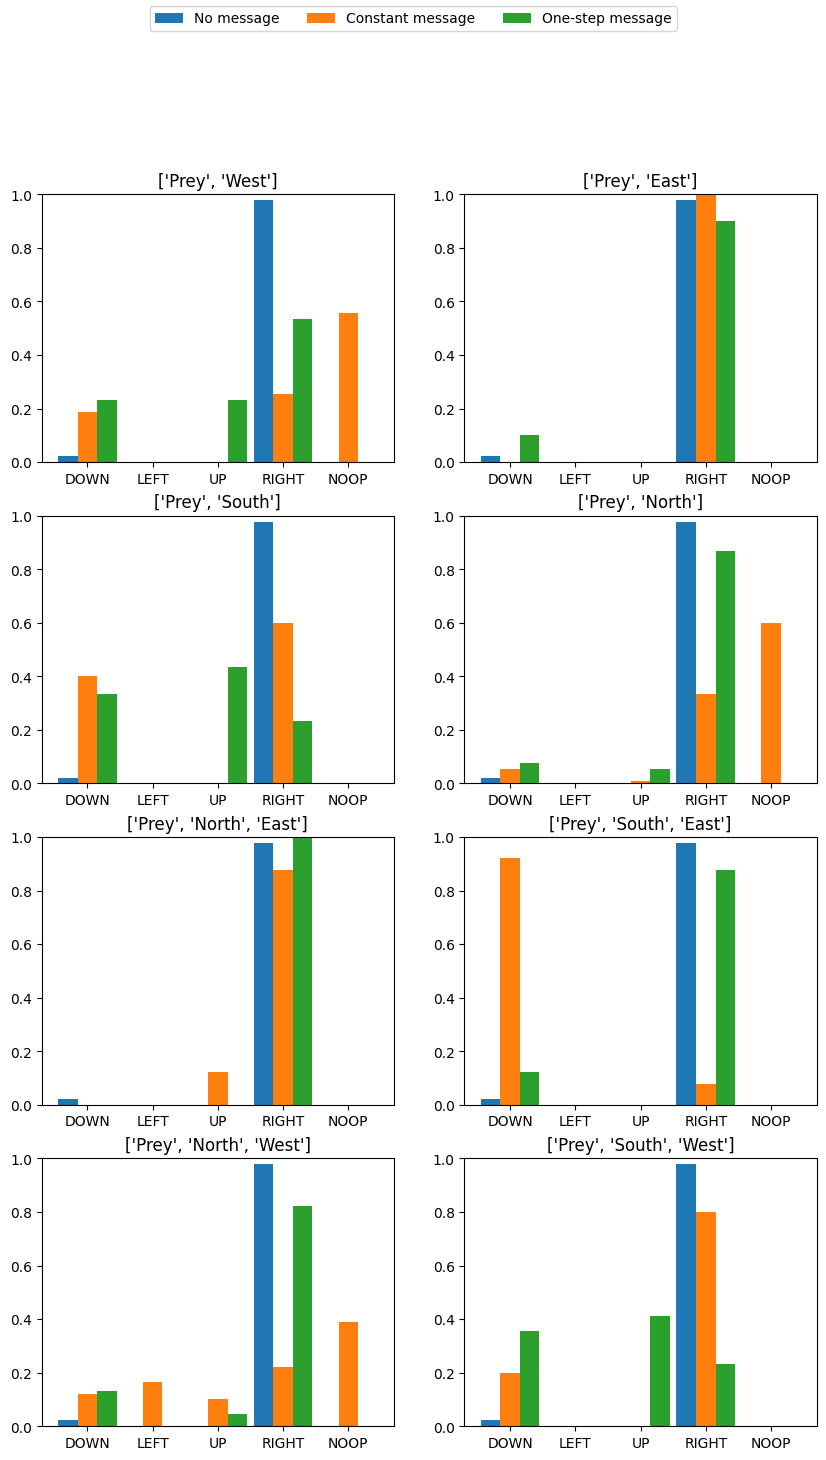

In [12]:
from collections import OrderedDict
import matplotlib.pyplot as plt

response_acts = ["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]
onestep_acts = ["onestep_DOWN", "onestep_LEFT", "onestep_UP", "onestep_RIGHT", "onestep_NOOP"]
baseline_acts = ["nocomm_DOWN", "nocomm_LEFT", "nocomm_UP", "nocomm_RIGHT", "nocomm_NOOP"]

fig, axs = plt.subplots(4, 2, figsize=(10, 16))

handles = []
for i, row in mess_act_response.iterrows():
    d = {
        "Messages": response_acts,
        "No message": row[baseline_acts].tolist(),
        "Constant message": row[response_acts].tolist(),
        "One-step message": row[onestep_acts].tolist()}
    df = pd.DataFrame(d, index=d["Messages"])
    
    df.plot.bar(rot=0, width=0.9, ax=axs[i // 2, i % 2], legend=False, title=row["Message"], ylim=(0.0, 1.0))
    
    
fig.legend(["No message", "Constant message", "One-step message"],loc = 'upper center', ncols=3)

In [3]:
def plot(path):
    constant_logs = load_n_compute_probs(path + ".csv")
    onestep_logs = load_n_compute_probs(path + "_onestep.csv")
    
    messages = constant_logs["Message"].unique()[:-1]
    
    mess_act_response = []
    for m in messages:
        const_mess_reponse = constant_logs.loc[constant_logs["Message"].eq(m)][
            [c for c in constant_logs if c.startswith("a")]]

        onestep_mess_response = onestep_logs.loc[onestep_logs["Message"].eq(m)][
            [c for c in onestep_logs if c.startswith("a")]]

        mess_init_pos = list(constant_logs[constant_logs["Message"] == m]["Init_pos"])
        nomess_baseline = constant_logs.loc[
            constant_logs["Message"].eq("[]") & constant_logs["Init_pos"].isin(mess_init_pos)].drop_duplicates(
            "Init_pos")[[c for c in constant_logs if c.startswith("a")]]

        mar = {
            "Message": m,
            "DOWN": const_mess_reponse.sum()["a0"] / const_mess_reponse.sum().sum(),
            "LEFT": const_mess_reponse.sum()["a1"] / const_mess_reponse.sum().sum(),
            "UP": const_mess_reponse.sum()["a2"] / const_mess_reponse.sum().sum(),
            "RIGHT": const_mess_reponse.sum()["a3"] / const_mess_reponse.sum().sum(),
            "NOOP": const_mess_reponse.sum()["a4"] / const_mess_reponse.sum().sum(),
            "onestep_DOWN": onestep_mess_response.sum()["a0"] / onestep_mess_response.sum().sum(),
            "onestep_LEFT": onestep_mess_response.sum()["a1"] / onestep_mess_response.sum().sum(),
            "onestep_UP": onestep_mess_response.sum()["a2"] / onestep_mess_response.sum().sum(),
            "onestep_RIGHT": onestep_mess_response.sum()["a3"] / onestep_mess_response.sum().sum(),
            "onestep_NOOP": onestep_mess_response.sum()["a4"] / onestep_mess_response.sum().sum(),
            "nocomm_DOWN": nomess_baseline.sum()["a0"] / nomess_baseline.sum().sum(),
            "nocomm_LEFT": nomess_baseline.sum()["a1"] / nomess_baseline.sum().sum(),
            "nocomm_UP": nomess_baseline.sum()["a2"] / nomess_baseline.sum().sum(),
            "nocomm_RIGHT": nomess_baseline.sum()["a3"] / nomess_baseline.sum().sum(),
            "nocomm_NOOP": nomess_baseline.sum()["a4"] / nomess_baseline.sum().sum(),
        }
        mess_act_response.append(mar)
    mess_act_response = pd.DataFrame(mess_act_response)
    
    response_acts = ["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]
    onestep_acts = ["onestep_DOWN", "onestep_LEFT", "onestep_UP", "onestep_RIGHT", "onestep_NOOP"]
    baseline_acts = ["nocomm_DOWN", "nocomm_LEFT", "nocomm_UP", "nocomm_RIGHT", "nocomm_NOOP"]

    fig, axs = plt.subplots(4, 2, figsize=(10, 16))

    handles = []
    for i, row in mess_act_response.iterrows():
        d = {
            "Messages": response_acts,
            "No message": row[baseline_acts].tolist(),
            "Constant message": row[response_acts].tolist(),
            "One-step message": row[onestep_acts].tolist()}
        df = pd.DataFrame(d, index=d["Messages"])

        df.plot.bar(rot=0, width=0.9, ax=axs[i // 2, i % 2], legend=False, title=row["Message"], ylim=(0.0, 1.0))


    fig.legend(["No message", "Constant message", "One-step message"],loc = 'upper center', ncols=3)

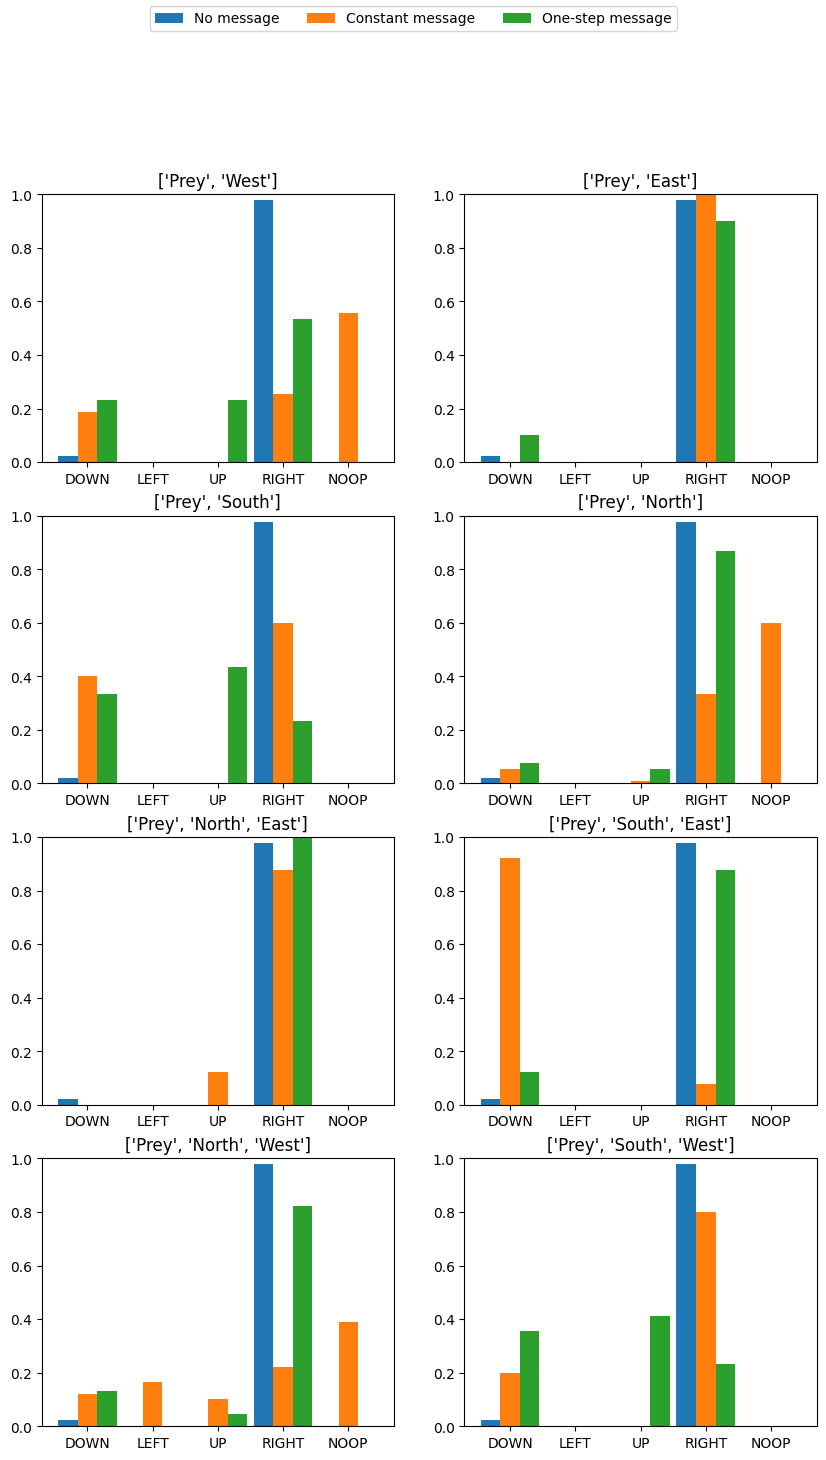

In [156]:
plot("../results/data/lamarl_interact/9o5_Diff_langsup3_center")

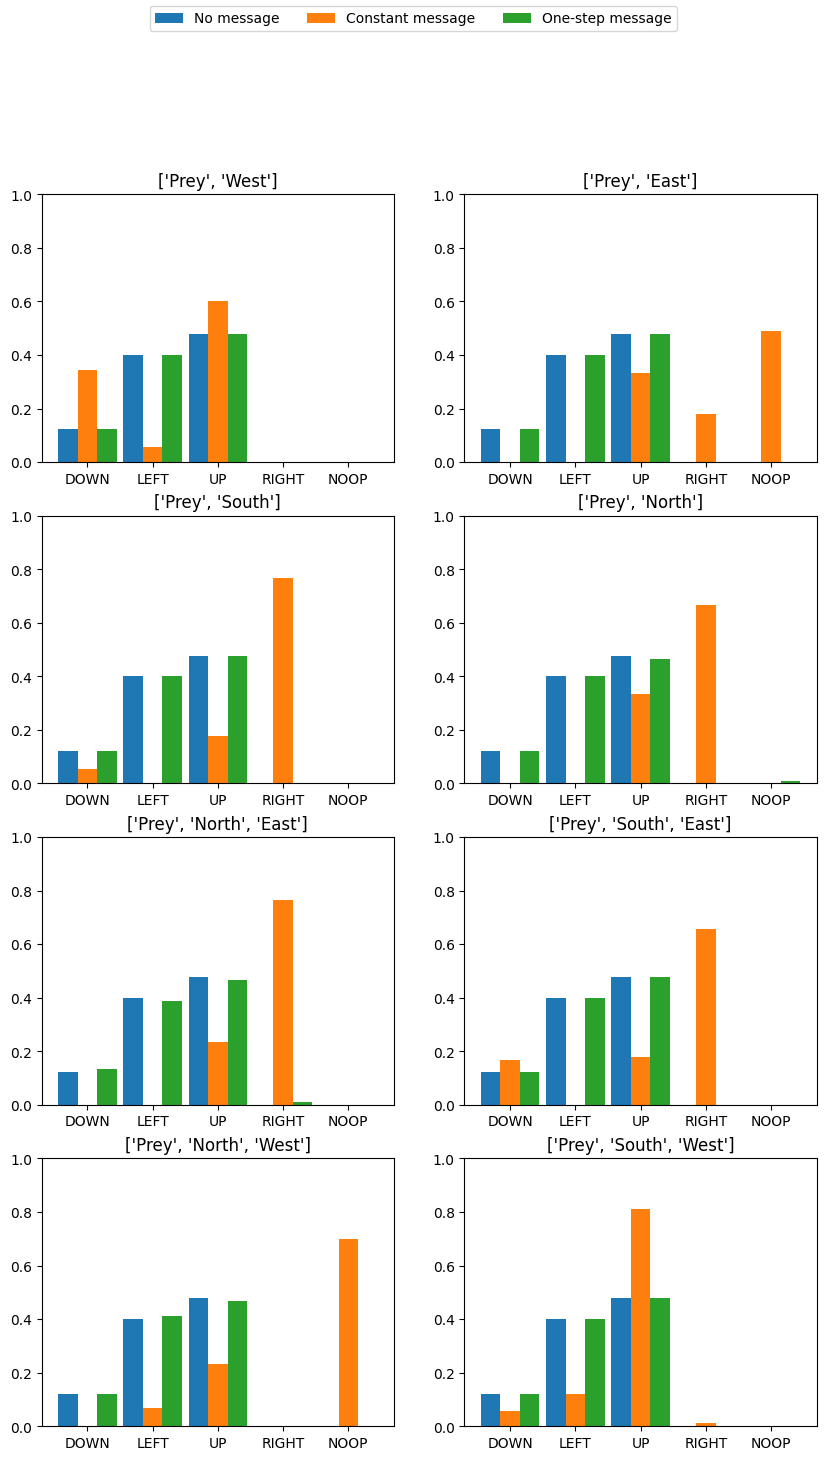

In [158]:
plot("../results/data/lamarl_interact/9o5_Diff_langsup0_center")

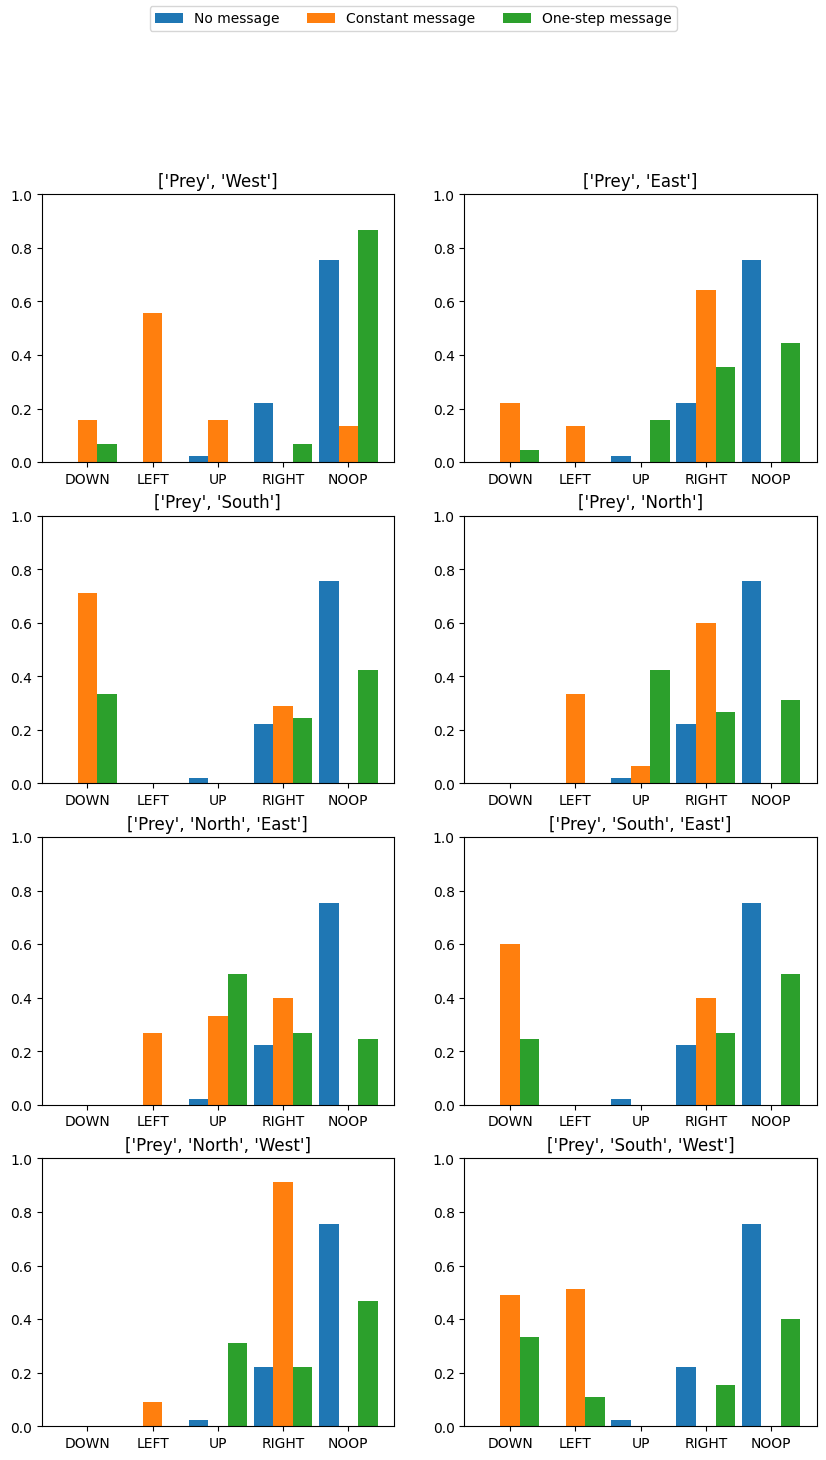

In [161]:
plot("../results/data/lamarl_interact/9o5_Diff_langsup5_center")

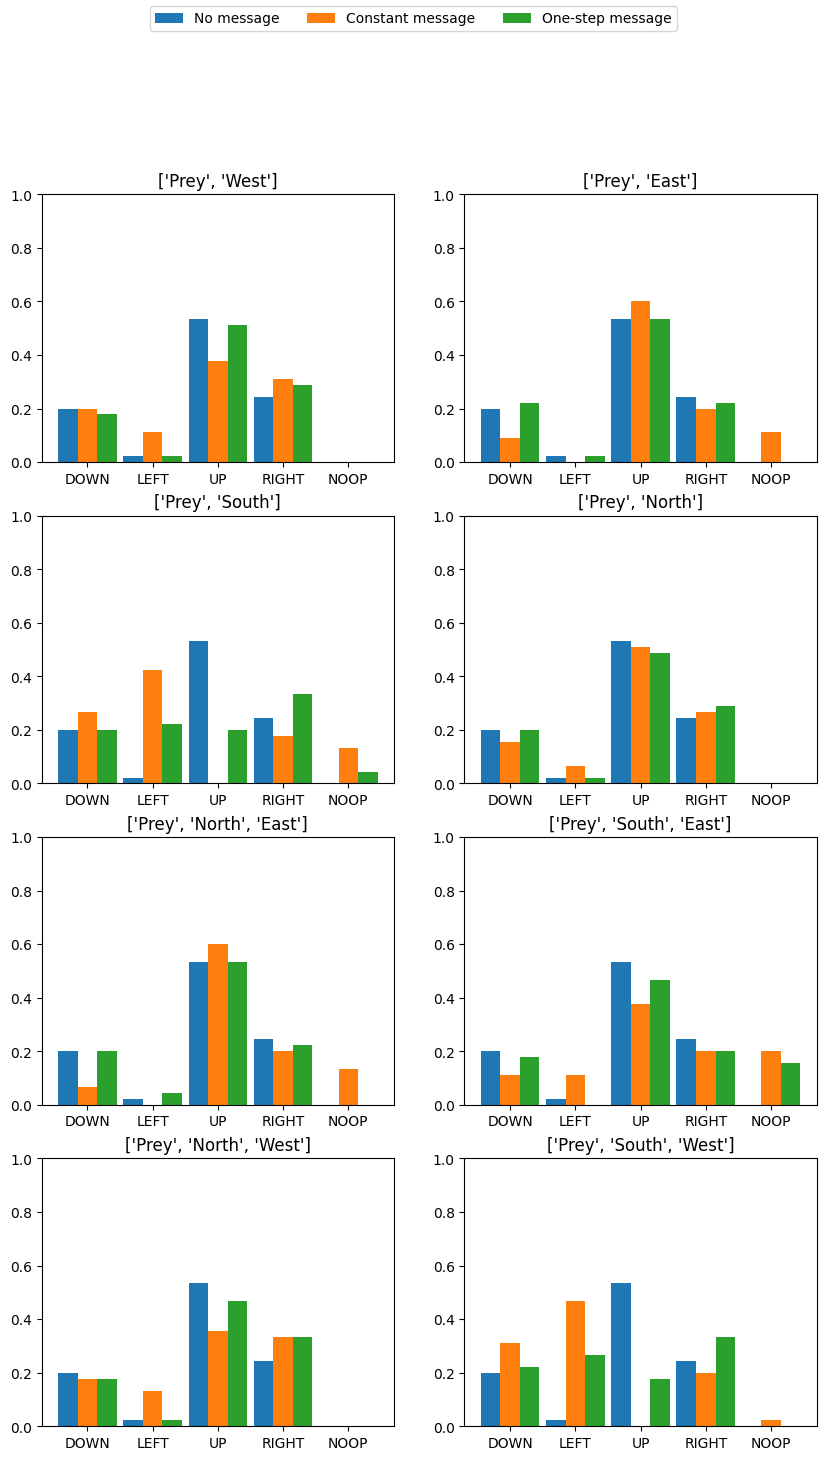

In [162]:
plot("../results/data/lamarl_interact/9o5SA_Diff_langsup4_center")

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt



In [5]:
actions = ["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]

def plot_interact(path):
    logs = pd.read_csv(path + ".csv", index_col=0)
    os_logs = pd.read_csv(path + "_onestep.csv", index_col=0)
    
    n_actions = logs.iloc[0][1:].sum()
    
    cols = logs.columns
    for i in range(5):
        a_c = [c for c in cols if type(c) is str and c.endswith(str(i))]

        logs[actions[i]] = (logs[a_c[0]] + logs[a_c[1]]) / n_actions
        os_logs[actions[i]] = (os_logs[a_c[0]] + os_logs[a_c[1]]) / n_actions
        
    baseline = logs[logs["Message"] == '[]'][["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]]
    const = logs[logs["Message"] != '[]'][["Message", "DOWN", "LEFT", "UP", "RIGHT", "NOOP"]]
    os = os_logs[os_logs["Message"] != '[]'][["Message", "DOWN", "LEFT", "UP", "RIGHT", "NOOP"]]
    
    messages = logs["Message"][:-1].tolist()
    
    fig, axs = plt.subplots(4, 2, figsize=(10, 16))

    for i, m in enumerate(messages):
        d = {
            "No message": baseline.iloc[0].tolist(),
            "Constant message": const[const["Message"] == m].iloc[0].tolist()[1:],
            "One-step message": os[os["Message"] == m].iloc[0].tolist()[1:]}
        df = pd.DataFrame(d)

        df.plot.bar(rot=0, width=0.9, ax=axs[i // 2, i % 2], legend=False, title=m, ylim=(0.0, 0.7))
        axs[i // 2, i % 2].set_xticklabels(actions)


    fig.legend(["No message", "Constant message", "One-step message"],loc = 'upper center', ncols=3)

    return df

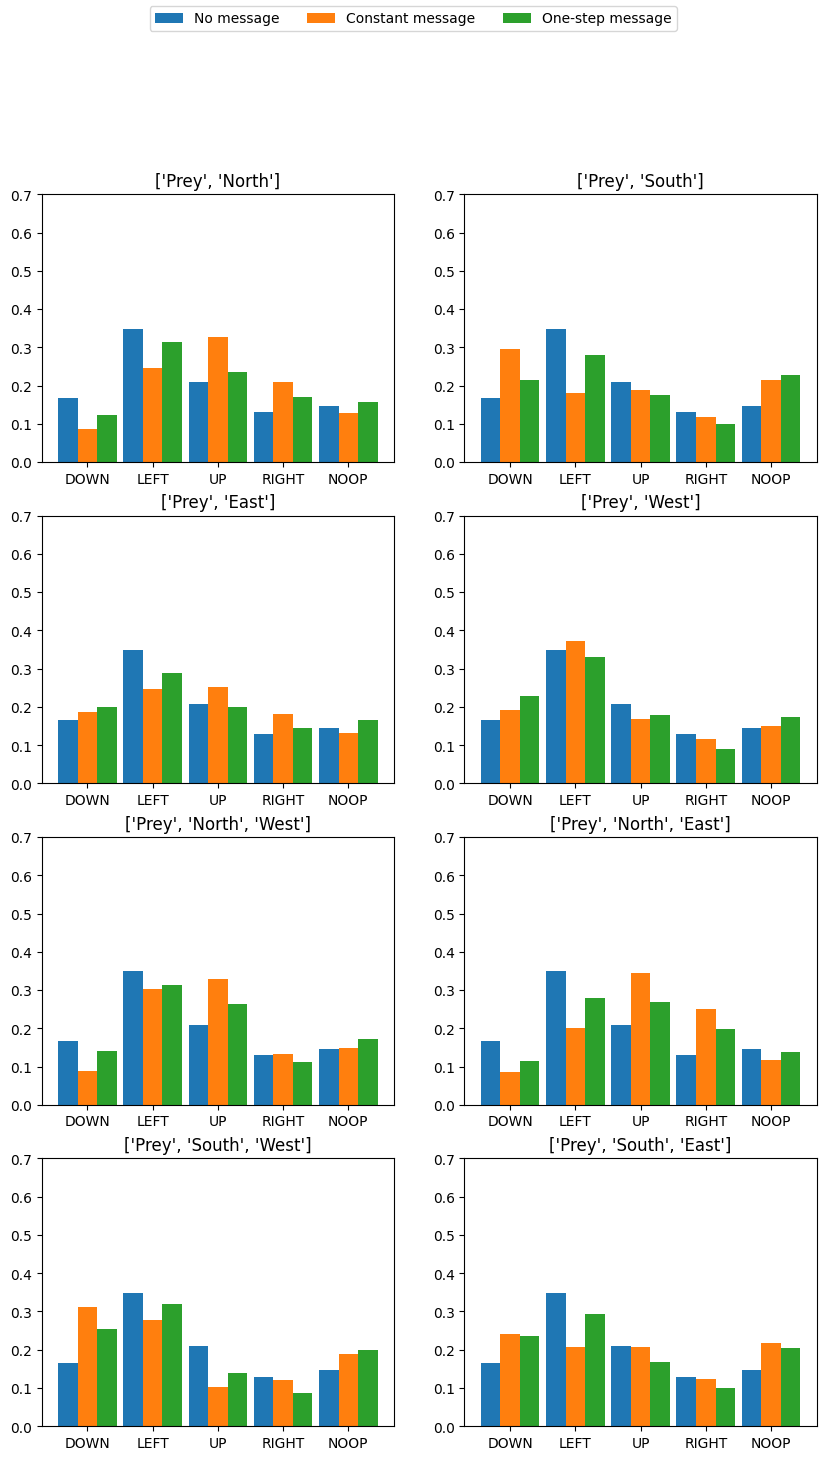

In [21]:
d = plot_interact("../results/data/lamarl_interact/2a6-9o5SA_langsup1_random")

# plt.savefig("/home/doctoq/Desktop/Rédac/LAMAC_figs/interact.svg", bbox_inches="tight")

In [20]:
d /= d["No message"]
d

,No message,Constant message,One-step message
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


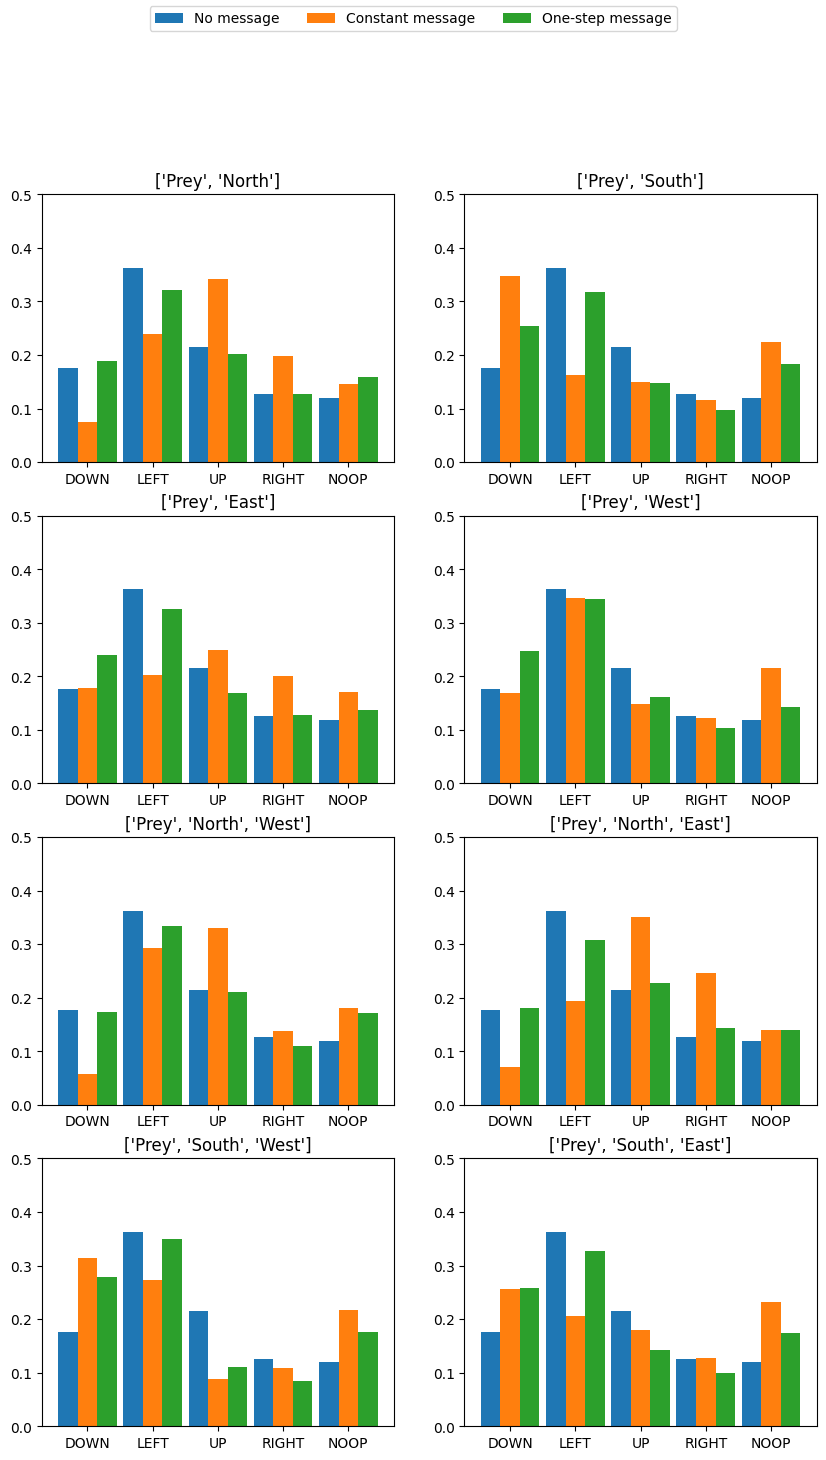

In [70]:
plot_interact("../results/data/lamarl_interact/2a6-9o5SA_langsup1_center")

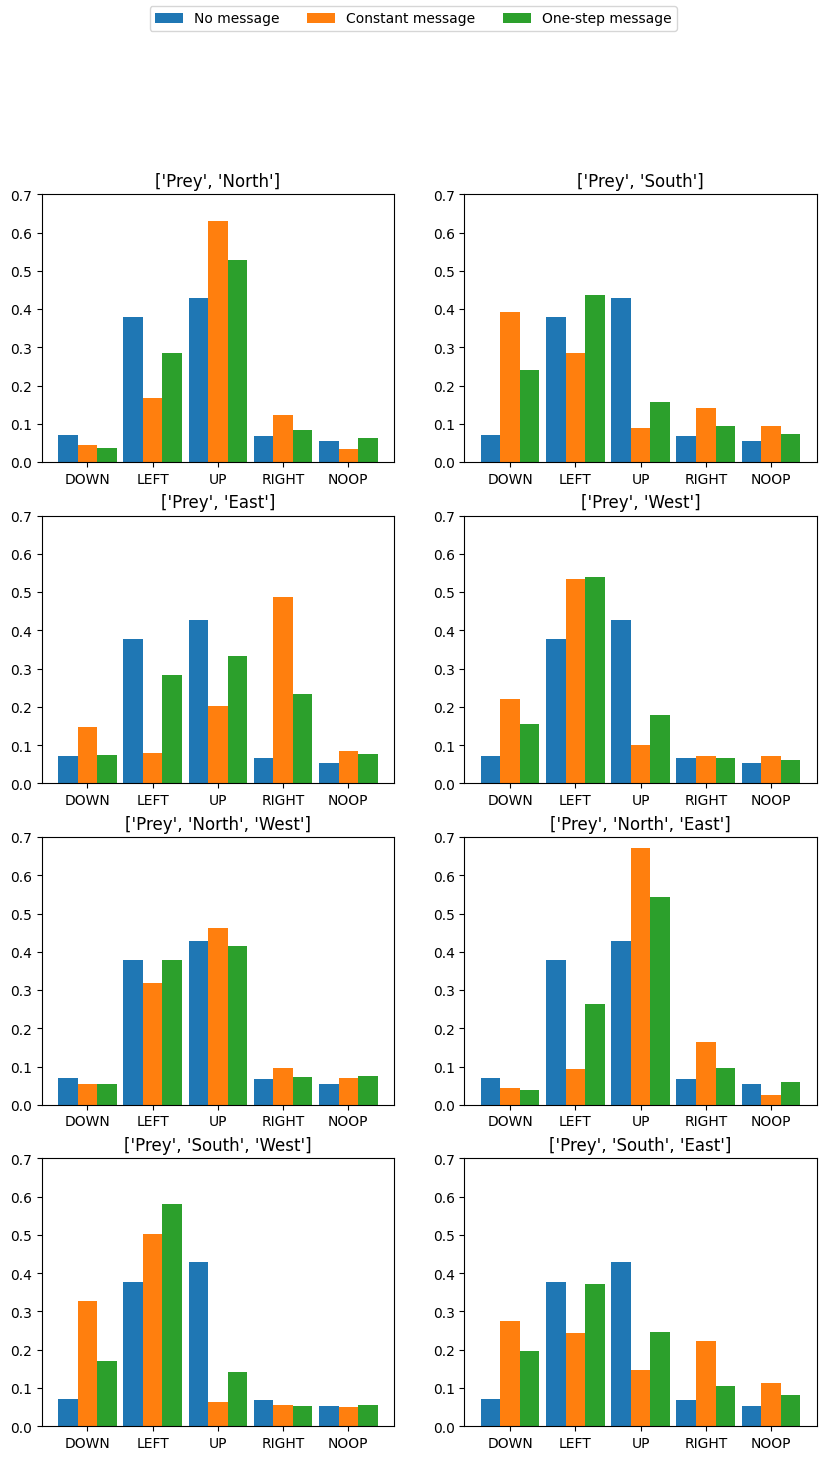

In [78]:
plot_interact("../results/data/lamarl_interact/Ad_2a9o5SA_15o5_langsup1_center")
plt.savefig("/home/doctoq/Desktop/Rédac/LAMAC_figs/interact.svg", bbox_inches="tight")

In [47]:
bp = "../results/data/lamarl_interact/18_lang_ce0"

const = None
os = None
for i in range(1, 8):
    logs = pd.read_csv(f"{bp}{i}_center.csv", index_col=0)
    if const is None:
        const = logs
    else:
        const.loc[:, const.columns != "Message"] += logs.drop("Message", axis=1)

    os_logs = pd.read_csv(f"{bp}{i}_center_onestep.csv", index_col=0)
    if os is None:
        os = os_logs
    else:
        os.loc[:, os.columns != "Message"] += os_logs.drop("Message", axis=1)

const.to_csv("../results/data/lamarl_interact/18_lang_ce0.csv")
const.to_csv("../results/data/lamarl_interact/18_lang_ce0_onestep.csv")


In [59]:
actions = ["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]

def load_n_build(path):
    logs = pd.read_csv(path + ".csv", index_col=0)
    os_logs = pd.read_csv(path + "_onestep.csv", index_col=0)
    
    n_actions = logs.iloc[0][1:].sum()
    
    cols = logs.columns
    for i in range(5):
        a_c = [c for c in cols if type(c) is str and c.endswith(str(i))]

        logs[actions[i]] = (logs[a_c[0]] + logs[a_c[1]]) / n_actions
        os_logs[actions[i]] = (os_logs[a_c[0]] + os_logs[a_c[1]]) / n_actions
        
    baseline = logs[logs["Message"] == '[]'][["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]]
    const = logs[logs["Message"] != '[]'][["Message", "DOWN", "LEFT", "UP", "RIGHT", "NOOP"]]
    os = os_logs[os_logs["Message"] != '[]'][["Message", "DOWN", "LEFT", "UP", "RIGHT", "NOOP"]]
    
    messages = logs["Message"][:-1].tolist()

    results = {}
    for i, m in enumerate(messages):
        nom = baseline.iloc[0].tolist()
        nm = sum(nom) / len(nom)
        # nom[3] += 0.02
        norm_const = [c / (nm) - 1 for c, n in zip(const[const["Message"] == m].iloc[0].tolist()[1:], nom)]
        nonorm_const = const[const["Message"] == m].iloc[0].tolist()[1:]
        norm_os = [(o / n) - 1 for o, n in zip(os[os["Message"] == m].iloc[0].tolist()[1:], nom)]
        d = {
            "No message": baseline.iloc[0].tolist(),
            "Constant message": nonorm_const,
            "Norm Constant message": norm_const,
            "One-step message": norm_os}
        results[m] = pd.DataFrame(d)

    return results

d = load_n_build("../results/data/lamarl_interact/2a6-9o5SA_langsup1_random")

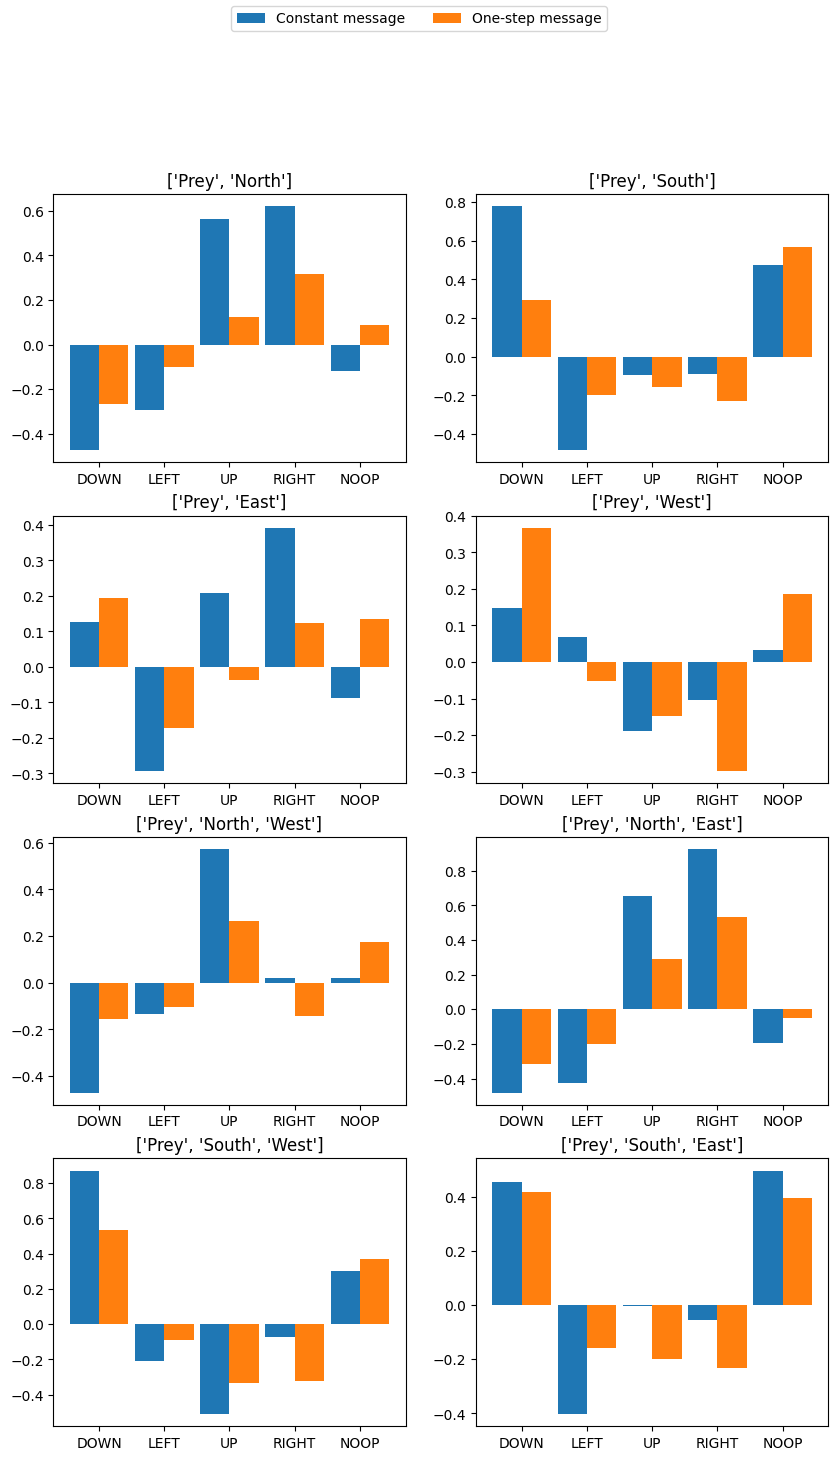

In [7]:
def plot_interact(results):
    fig, axs = plt.subplots(4, 2, figsize=(10, 16))

    for i, m in enumerate(results):
        df = results[m]
        # df.loc[3, "No message"] += 0.01
        # print(df)
        df.plot.bar(rot=0, width=0.9, ax=axs[i // 2, i % 2], legend=False, title=m)#, ylim=(-1, 1))
        axs[i // 2, i % 2].set_xticklabels(actions)


    fig.legend(df.keys(), loc = 'upper center', ncols=2)

plot_interact(d)

In [89]:
d["['Prey', 'North']"]

,Constant message,One-step message
0,-0.472616,-0.264989
1,-0.293052,-0.099520
2,0.564924,0.122215
3,0.619238,0.314601
4,-0.118745,0.085702


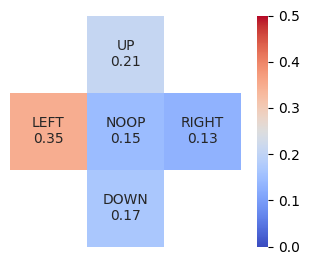

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

actions = ["DOWN", "LEFT", "UP", "RIGHT", "NOOP"]

def make_matrix(probs):
    hm = np.zeros((3, 3))

    hm[0, 1] = probs[2]
    hm[1, 0] = probs[1]
    hm[1, 1] = probs[4]
    hm[1, 2] = probs[3]
    hm[2, 1] = probs[0]

    return hm

def plot_heatmap(matrix, ax, title, lims):
    """
    Plots a heatmap for a given matrix of probabilities, automatically constructing action labels.

    Parameters:
    - matrix: 2D numpy array of probabilities.
    """
    actions_map = {
        (0, 1): "UP",
        (1, 0): "LEFT",
        (1, 1): "NOOP",
        (1, 2): "RIGHT",
        (2, 1): "DOWN"
    }

    # Create the action labels
    action_labels = np.empty_like(matrix, dtype=object)
    for (i, j), action in actions_map.items():
        if matrix[i, j] != 0:
            action_labels[i, j] = f"{action}\n{matrix[i, j]:.2f}"
        else:
            action_labels[i, j] = ""

    # Create a mask to hide the corners of the heatmap
    mask = np.array(matrix == 0)

    # Create the heatmap
    sns.heatmap(
        matrix, 
        annot=action_labels, 
        fmt="", 
        cmap="coolwarm", 
        mask=mask, 
        cbar=True,
        linewidths=0.0, 
        square=True,
        ax=ax,
        vmin=lims[0],
        vmax=lims[1])

    # Set the ticks and labels
    ax.set_xticks([], [])
    ax.set_yticks([], [])

    # Show the heatmap
    # ax.set_title(title, fontsize=16)


def plot_interact_hm(results, col="Constant message"):
    fig, axs = plt.subplots(1, 1, figsize=(4, 3))
        
    lims = (-0.8, 0.8) if "Norm" in col else (0.0, 0.5)

    for i, m in enumerate(results):
        if i > 3:
            break
        probs = list(results[m][col])

        hm = make_matrix(probs)

        plot_heatmap(hm, axs, m, lims)
        break


        # df.plot.bar(rot=0, width=0.9, ax=axs[i // 2, i % 2], legend=False, title=m)#, ylim=(-1, 1))
        # axs[i // 2, i % 2].set_xticklabels(actions)

    

    # fig.legend(df.keys(), loc = 'upper center', ncols=2)

plot_interact_hm(d, "No message")

plt.savefig("/home/maxtoq/Desktop/LAMARL_ICML/interact_actprobs_nomessage.svg", bbox_inches="tight")
plt.show()

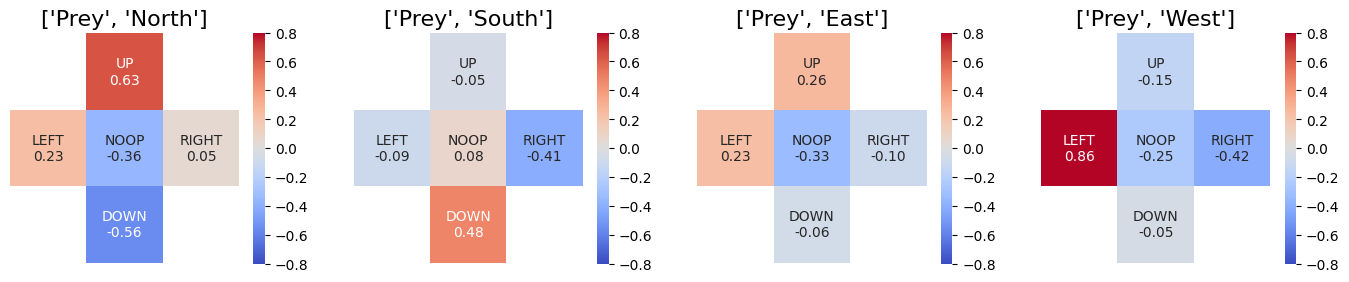

In [60]:
plot_interact_hm(d, "Norm Constant message")

# plt.savefig("/home/maxtoq/Desktop/LAMARL_ICML/interact_actprobs_norm.svg", bbox_inches="tight")
plt.show()

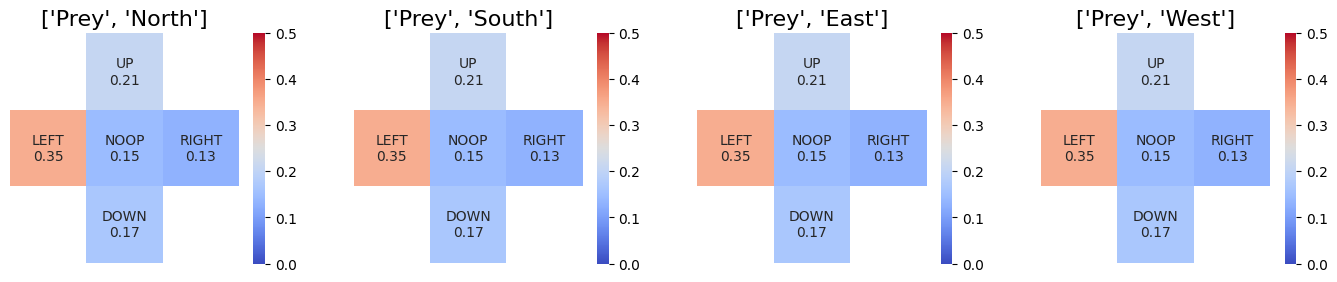

In [42]:
plot_interact_hm(d, "No message")

plt.savefig("/home/maxtoq/Desktop/LAMARL_ICML/interact_actprobs_nomessage.svg", bbox_inches="tight")
plt.show()

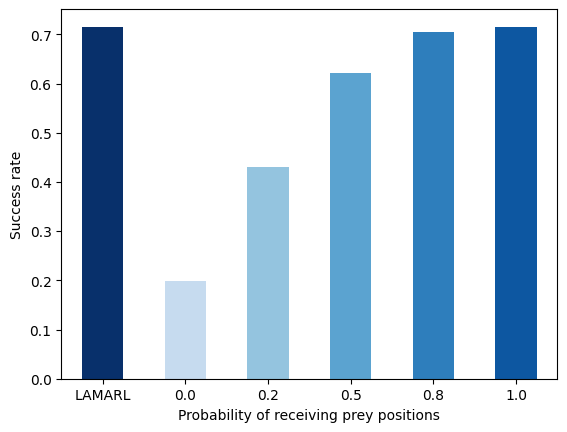

In [75]:
def load_interact(path):
    logs = pd.read_csv(path, index_col=0)

    colors = plt.cm.Blues(np.linspace(0.1, 1.0, 7))
    colors[0] = colors[-1]
    colors = colors[:-1]
    logs.index = ["LAMARL", "0.0", "0.2", "0.5", "0.8", "1.0"]
    logs["Success rate"].plot.bar(color=colors, rot=0, ylabel="Success rate", xlabel="Probability of receiving prey positions")

load_interact("../models/magym_PredPrey_RGB/18s50np_lang_ce0/interact.csv")